In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
ratings_Sadegh = pd.read_csv('labels_output_Sadegh.csv')
ratings_Eslami = pd.read_csv('labels_output_Eslami.csv')
ratings_Sadegh.head()

question  tfidf2  zero2  tfidf1  zero1  ft2  zero3  ft3  ft1  tfidf3
0         1       7      9       6      8    1      4    2    3       5
1         2       7      6       3      8    2      9    4    5       1
2         3       3      9       2      8    7      6    4    1       5
3         4       9      8       7      6    5      1    4    3       2
4         5       2      9       3      8    7      6    5    1       4

In [31]:
ratings_Eslami.head()

question  tfidf2  zero2  tfidf1  zero1  ft2  zero3  ft3  ft1  tfidf3
0         1       9      7       5      6    4      8    2    3       1
1         2       6      9       5      8    2      7    3    4       1
2         3       3      9       2      8    6      7    5    1       4
3         4       9      2       8      1    3      6    4    7       5
4         5       1      4       3      8    5      9    6    7       2

In [32]:
ratings_Sadegh['annotator'] = 'Sadegh'
ratings_Eslami['annotator'] = 'Eslami'

ratings_combined = pd.concat([ratings_Sadegh, ratings_Eslami], ignore_index=True)
ratings_combined['entry_id'] = ratings_combined.index + 1

ratings_combined.head(52)


question  tfidf2  zero2  tfidf1  zero1  ft2  zero3  ft3  ft1  tfidf3  \
0          1       7      9       6      8    1      4    2    3       5   
1          2       7      6       3      8    2      9    4    5       1   
2          3       3      9       2      8    7      6    4    1       5   
3          4       9      8       7      6    5      1    4    3       2   
4          5       2      9       3      8    7      6    5    1       4   
5          6       5      9       2      8    1      7    6    4       3   
6          7       7      4       3      9    5      8    6    2       1   
7          8       9      8       7      4    3      6    1    2       5   
8          9       2      3       1      9    6      8    4    7       5   
9         10       5      4       9      3    8      2    7    6       1   
10        11       3      7       5      8    4      9    2    1       6   
11        12       7      8       6      5    4      9    3    1       2   
12        13       7      6       5      8    3      9    2    1       4   
13        14       9      8       6      2    3      7    5    1       4   
14        15       9      3       8      4    2      7    5    1       6   
15        16       4      5       3      9    8      2    7    6       1   
16        17       4      7       3      9    1      8    2    5       6   
17        18       9      8       5      7    4      6    3    1       2   
18        19       9      3       2      1    8      7    6    4       5   
19        20       8      7       2      3    4      5    6    1       9   
20        21       4      6       3      7    5      8    2    1       9   
21        22       4      5       3      9    6      8    2    1       7   
22        23       8      6       9      7    3      2    1    5       4   
23        24       4      9       8      1    7      6    3    2       5   
24        25       5      8       4      7    3      1    9    2       6   
25        26       6      5       4      7    3      8    2    1       9   
26        27       8      7       5      3    1      9    4    2       6   
27        28       3      9       1      8    7      6    5    2       4   
28        29       9      5       6      8    7      2    1    3       4   
29        30       4      9       6      8    3      7    2    1       5   
30        31       6      9       5      8    4      7    2    1       3   
31        32       1      9       2      8    3      7    6    4       5   
32        33       4      9       7      8    2      6    5    1       3   
33        34       4      8       3      9    7      6    1    5       2   
34        35       4      9       3      8    6      7    2    1       5   
35        36       6      7       4      8    5      9    1    2       3   
36        37       7      8       3      9    2      6    4    1       5   
37        38       2      8       1      9    3      6    7    4       5   
38        39       5      9       1      8    2      3    6    4       7   
39        40       1      9       6      8    2      7    3    4       5   
40        41       4      9       2      5    8      7    6    1       3   
41        42       2      9       4      8    1      7    6    5       3   
42        43       1      9       8      7    6      5    4    2       3   
43        44       8      6       2      9    5      4    1    3       7   
44        45       6      7       1      8    5      9    2    3       4   
45        46       6      7       5      8    4      9    1    2       3   
46        47       4      6       1      7    3      8    2    5       9   
47        48       7      6       1      9    5      8    3    2       4   
48        49       5      9       4      8    3      7    2    1       6   
49        50       4      9       2      8    3      7    6    1       5   
50         1       9      7       5      6    4      8    2    3       1   
51         2       6      9       5      8    2     

In [33]:
long_df = ratings_combined.melt(
    id_vars=['annotator', 'question'],
    var_name='output_label',
    value_name='rank'
)

model_map = {
    'tfidf1': 'TF-IDF', 'tfidf2': 'TF-IDF', 'tfidf3': 'TF-IDF',
    'zero1': 'Zero-shot', 'zero2': 'Zero-shot', 'zero3': 'Zero-shot',
    'ft1': 'Fine-tuned', 'ft2': 'Fine-tuned', 'ft3': 'Fine-tuned'
}
long_df['model'] = long_df['output_label'].map(model_map)


## Metricks

model
Fine-tuned    3.810000
TF-IDF        4.386667
Zero-shot     6.803333
Name: rank, dtype: float64


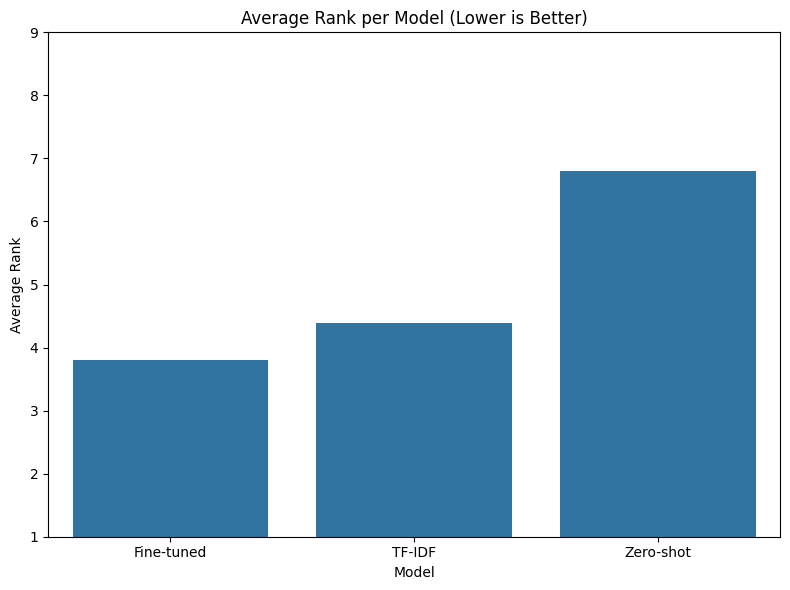

In [34]:
# ---------------------
# 📊 Average Rank Plot
# ---------------------
avg_rank = long_df.groupby("model")["rank"].mean().sort_values()
print(avg_rank)
# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_rank.index, y=avg_rank.values)
plt.title("Average Rank per Model (Lower is Better)")
plt.ylabel("Average Rank")
plt.xlabel("Model")
plt.ylim(1, 9)
plt.tight_layout()
plt.show()

### Top-k

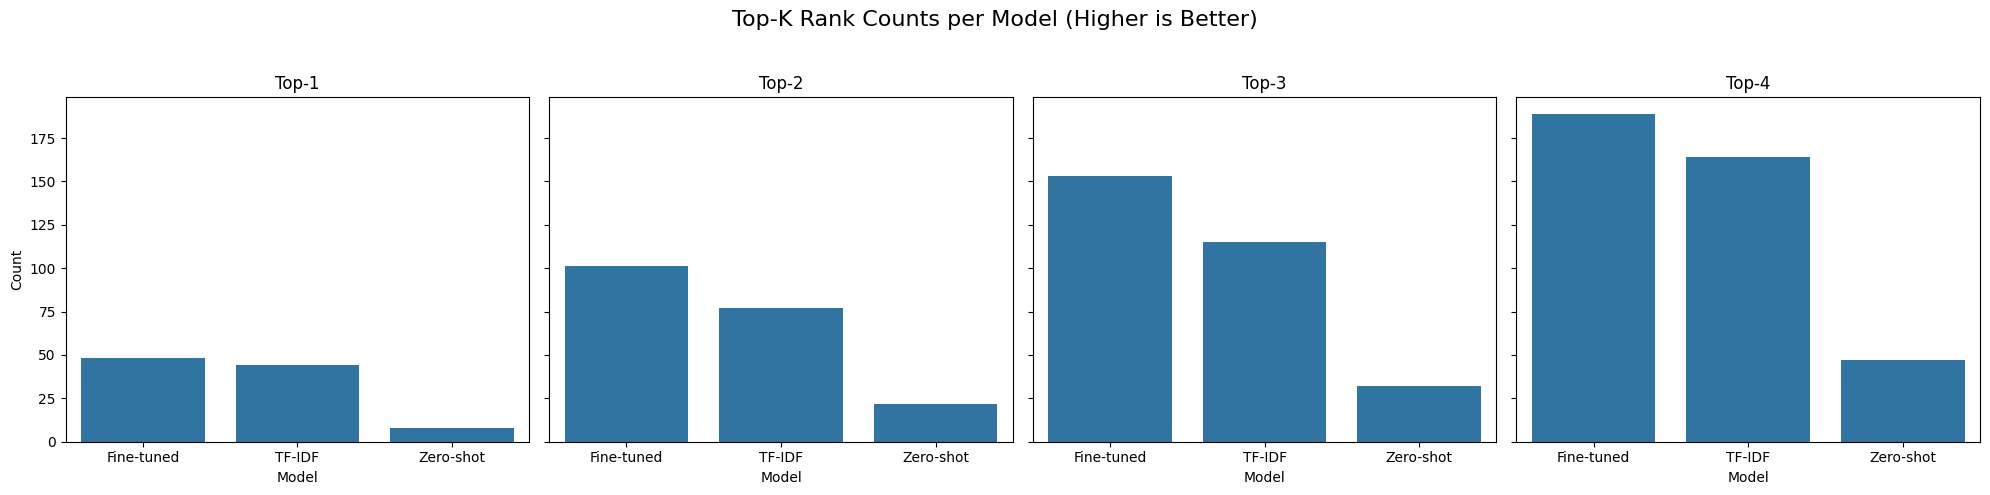


📊 Top-1 Rank Count:
model
Fine-tuned    48
TF-IDF        44
Zero-shot      8
Name: rank, dtype: int64

📊 Top-2 Rank Count:
model
Fine-tuned    101
TF-IDF         77
Zero-shot      22
Name: rank, dtype: int64

📊 Top-3 Rank Count:
model
Fine-tuned    153
TF-IDF        115
Zero-shot      32
Name: rank, dtype: int64

📊 Top-4 Rank Count:
model
Fine-tuned    189
TF-IDF        164
Zero-shot      47
Name: rank, dtype: int64


In [ ]:
k_values = [1, 2, 3, 4]

fig, axes = plt.subplots(1, len(k_values), figsize=(20, 5), sharey=True)
fig.suptitle("Top-K Rank Counts per Model (Higher is Better)", fontsize=16)


top_k_results = {}

for i, k in enumerate(k_values):
    # Count how many times each model had rank ≤ k
    top_k_count = (long_df["rank"] <= k).groupby(long_df["model"]).sum().sort_values(ascending=False)
    top_k_results[f"Top-{k}"] = top_k_count

    # Plot bar chart
    sns.barplot(x=top_k_count.index, y=top_k_count.values, ax=axes[i])
    axes[i].set_title(f"Top-{k}")
    axes[i].set_xlabel("Model")
    if i == 0:
        axes[i].set_ylabel("Count")
    else:
        axes[i].set_ylabel("")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Print numerical counts
for k, counts in top_k_results.items():
    print(f"\n📊 {k} Rank Count:")
    print(counts)

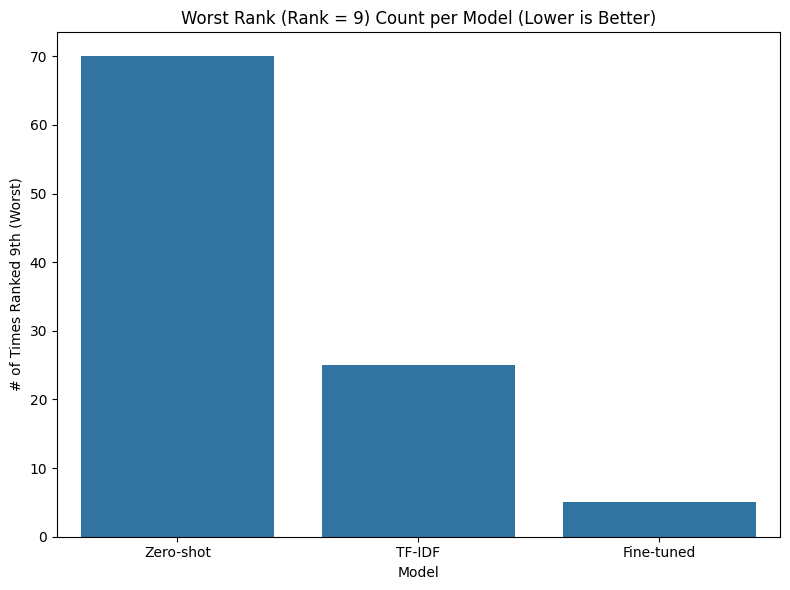


📉 Rank-9 (Worst) Count per Model:
model
Zero-shot     70
TF-IDF        25
Fine-tuned     5
Name: rank, dtype: int64


In [ ]:
# Reuse `long_df` from previous steps

# --------------------------
# 📊 Rank-9 Count per Model
# --------------------------
rank9_count = (long_df["rank"] == 9).groupby(long_df["model"]).sum().sort_values(ascending=False)


plt.figure(figsize=(8, 6))
sns.barplot(x=rank9_count.index, y=rank9_count.values)
plt.title("Worst Rank (Rank = 9) Count per Model (Lower is Better)")
plt.ylabel("# of Times Ranked 9th (Worst)")
plt.xlabel("Model")
plt.tight_layout()
plt.show()

# Print counts
print("\n📉 Rank-9 (Worst) Count per Model:")
print(rank9_count)
